In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import os



# Wczytanie pliku
df = pd.read_excel('data/banking_dataset.xlsx')

# Wyświetlenie pierwszych kilku wierszy
print(df.head())


  Account ID        Customer Name       Account Type        Branch  \
0   ACC00001          Amanda Pugh  Recurring Deposit      New York   
1   ACC00002        Amanda Wilcox  Recurring Deposit       Houston   
2   ACC00003  Kimberly Valenzuela            Current      New York   
3   ACC00004        Sonia Ballard  Recurring Deposit  Philadelphia   
4   ACC00005        Erika Russell            Current  Philadelphia   

  Transaction Type  Transaction Amount  Account Balance Currency  
0            Debit             2687.19         36676.19      GBP  
1            Debit             3886.77         28582.82      USD  
2           Credit             2438.74         76599.56      GBP  
3           Credit             2758.53         62317.60      INR  
4            Debit             3287.00         85515.21      INR  


In [2]:
df.shape

(10000, 8)

In [3]:

# Ustawienia stylu wykresów
sns.set(style='whitegrid')


print(df.info())

print(df.nunique())


print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Account ID          10000 non-null  object 
 1   Customer Name       10000 non-null  object 
 2   Account Type        10000 non-null  object 
 3   Branch              10000 non-null  object 
 4   Transaction Type    10000 non-null  object 
 5   Transaction Amount  10000 non-null  float64
 6   Account Balance     10000 non-null  float64
 7   Currency            10000 non-null  object 
dtypes: float64(2), object(6)
memory usage: 625.1+ KB
None
Account ID            10000
Customer Name          9323
Account Type              4
Branch                    8
Transaction Type          2
Transaction Amount     9896
Account Balance        9995
Currency                  5
dtype: int64
Account ID            0
Customer Name         0
Account Type          0
Branch                0
Transaction

In [4]:
print("Statystyki opisowe:")
print(df.describe(include='all'))

Statystyki opisowe:
       Account ID     Customer Name Account Type        Branch  \
count       10000             10000        10000         10000   
unique      10000              9323            4             8   
top      ACC00001  William Williams      Savings  Philadelphia   
freq            1                 7         2580          1288   
mean          NaN               NaN          NaN           NaN   
std           NaN               NaN          NaN           NaN   
min           NaN               NaN          NaN           NaN   
25%           NaN               NaN          NaN           NaN   
50%           NaN               NaN          NaN           NaN   
75%           NaN               NaN          NaN           NaN   
max           NaN               NaN          NaN           NaN   

       Transaction Type  Transaction Amount  Account Balance Currency  
count             10000        10000.000000     10000.000000    10000  
unique                2                 NaN

### Sprawdzamy korelacje pomiędzy zmiennymi

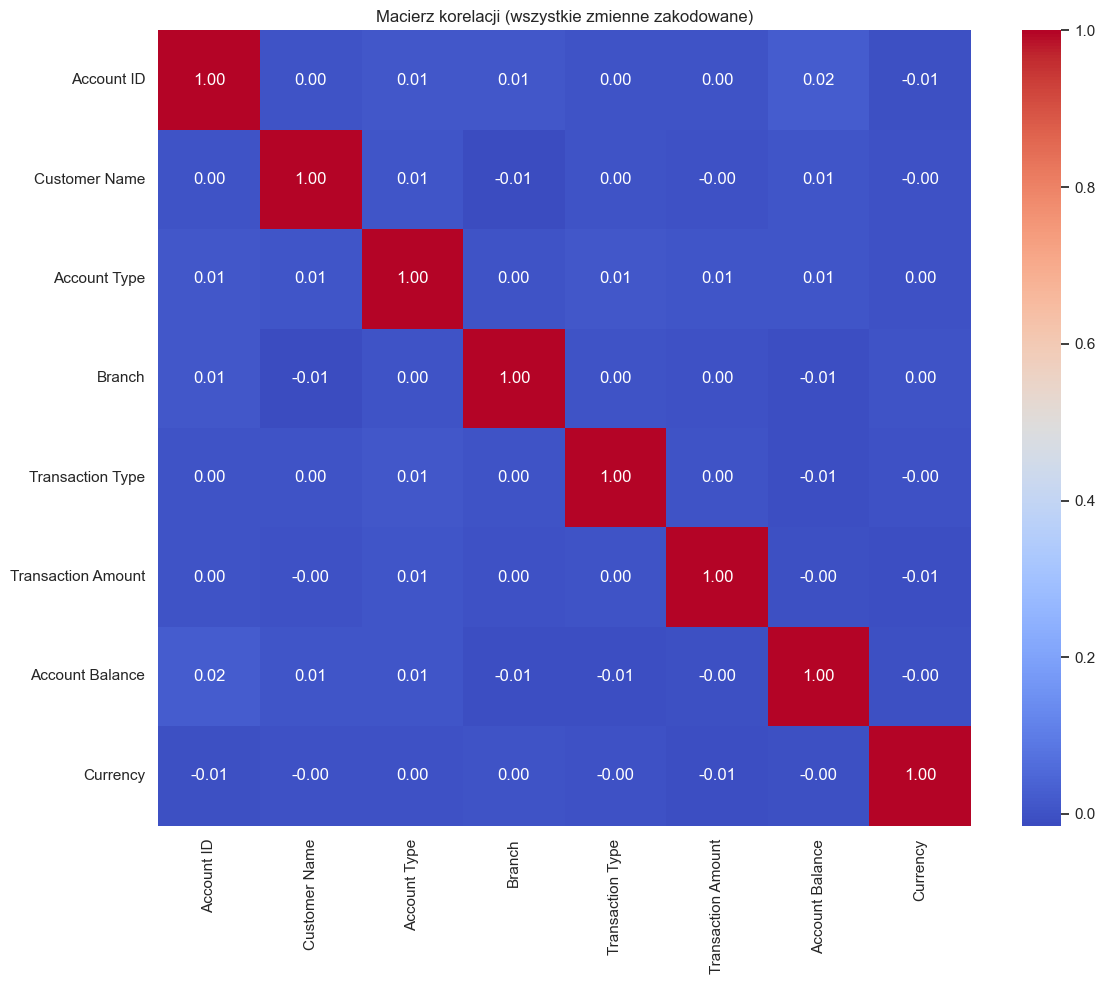

In [5]:

# Tworzymy kopię danych
df_encoded = df.copy()

# Label Encoding dla wszystkich kolumn kategorycznych
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Obliczenie korelacji
correlation_matrix = df_encoded.corr()

# Wizualizacja korelacji
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Macierz korelacji (wszystkie zmienne zakodowane)")
plt.tight_layout()
plt.show()


In [6]:
# Usuwamy kolumny account id i customer name bo nie wpływają one na predykcyjność modelu
df_clean = df.drop(columns=['Account ID', 'Customer Name'])


### Analiza zmiennych kategorycznych

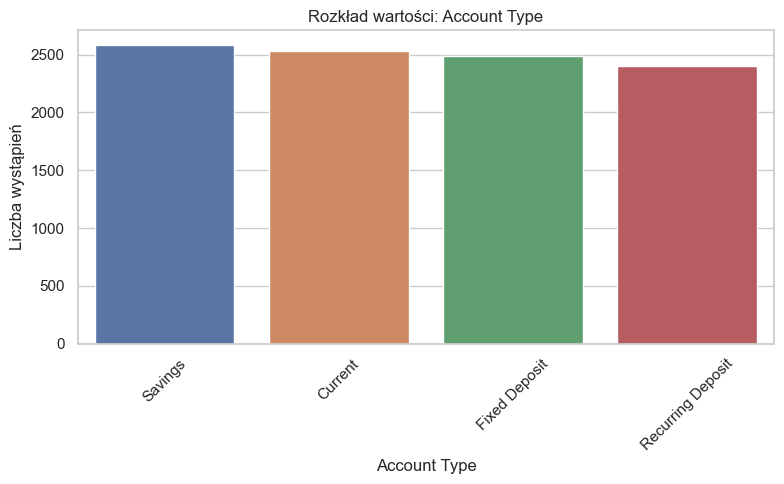

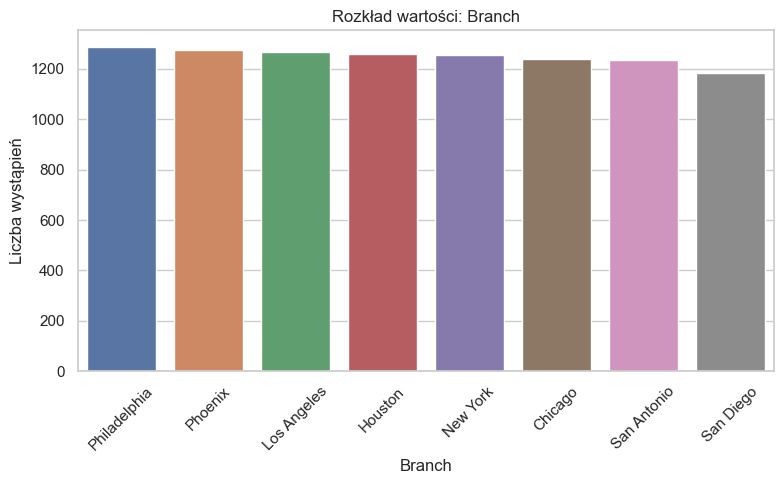

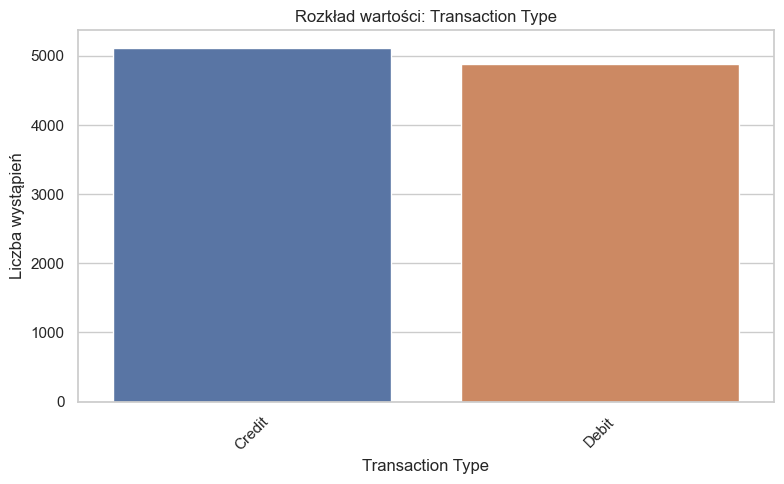

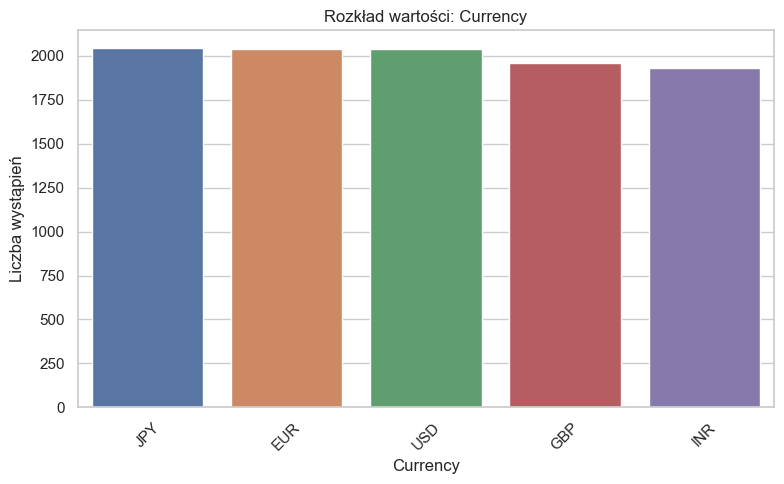

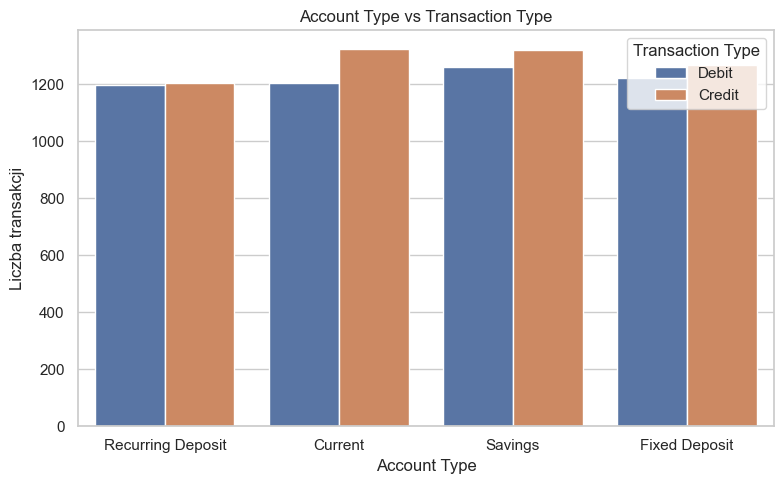

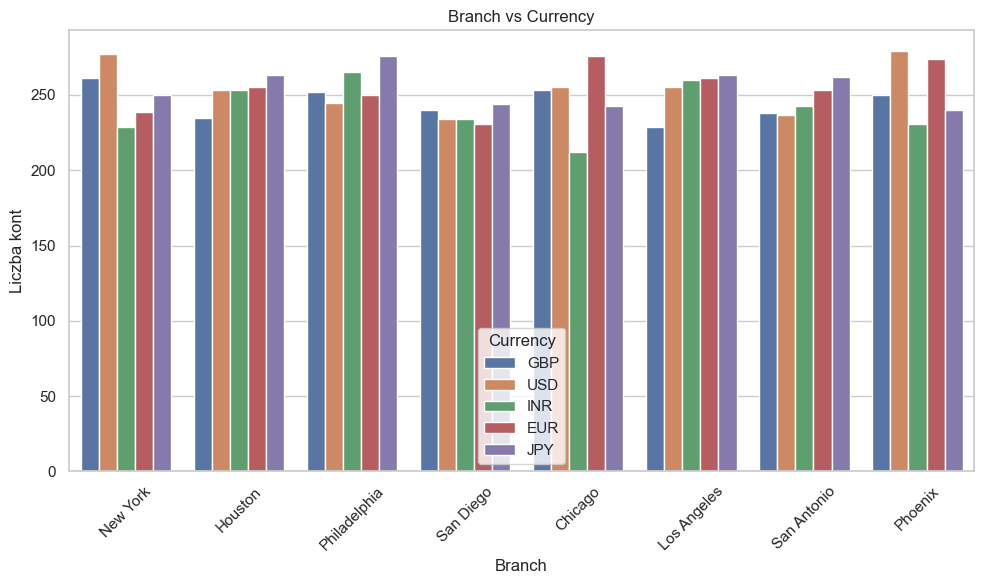

In [7]:

# Usunięcie zbędnych kolumn
df_clean = df.drop(columns=['Account ID', 'Customer Name'])

# Lista kolumn kategorycznych
categorical_columns = ['Account Type', 'Branch', 'Transaction Type', 'Currency']

# Wykresy słupkowe dla rozkładu kategorii
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_clean, x=col, order=df_clean[col].value_counts().index)
    plt.title(f'Rozkład wartości: {col}')
    plt.xlabel(col)
    plt.ylabel('Liczba wystąpień')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Relacja: Account Type vs Transaction Type
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='Account Type', hue='Transaction Type')
plt.title('Account Type vs Transaction Type')
plt.xlabel('Account Type')
plt.ylabel('Liczba transakcji')
plt.tight_layout()
plt.show()

# Relacja: Branch vs Currency
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Branch', hue='Currency')
plt.title('Branch vs Currency')
plt.xlabel('Branch')
plt.ylabel('Liczba kont')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analiza zmiennych ilościowych

Statystyki opisowe zmiennych liczbowych:
       Transaction Amount  Account Balance
count        10000.000000     10000.000000
mean          2524.564298     50269.794260
std           1444.318039     29057.726646
min             10.970000       101.890000
25%           1263.912500     24863.487500
50%           2544.655000     50790.475000
75%           3781.757500     75128.187500
max           4999.790000     99975.590000


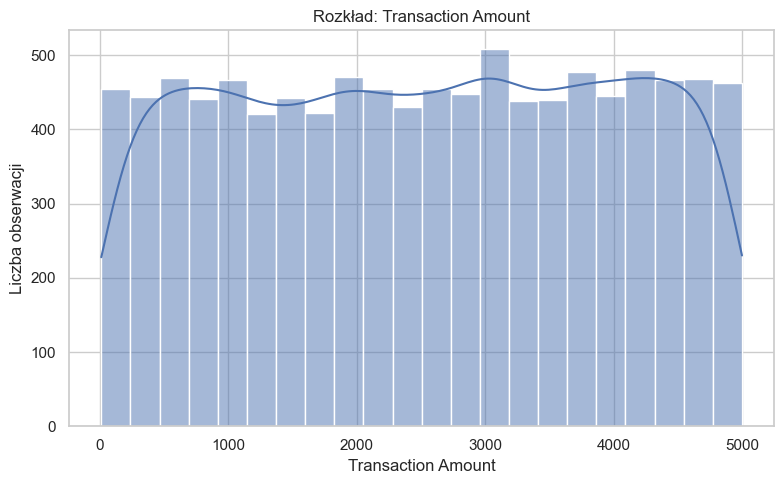

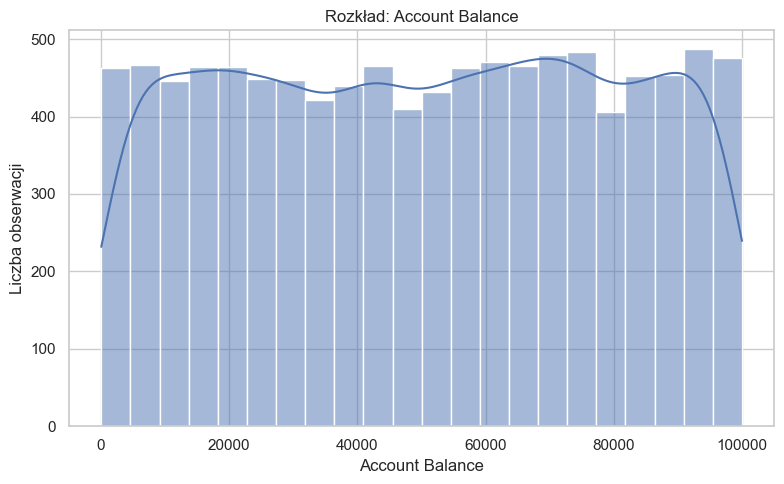

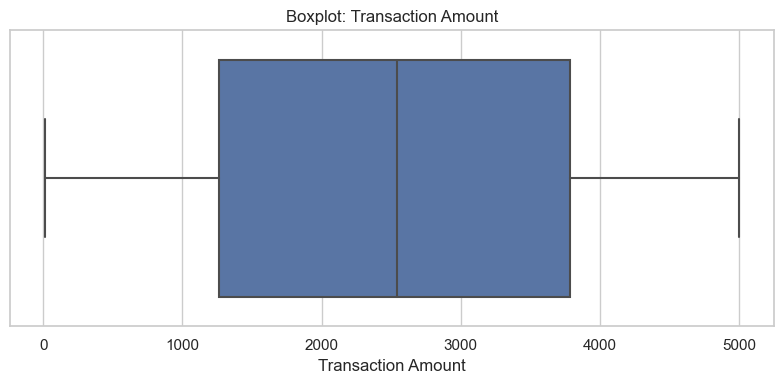

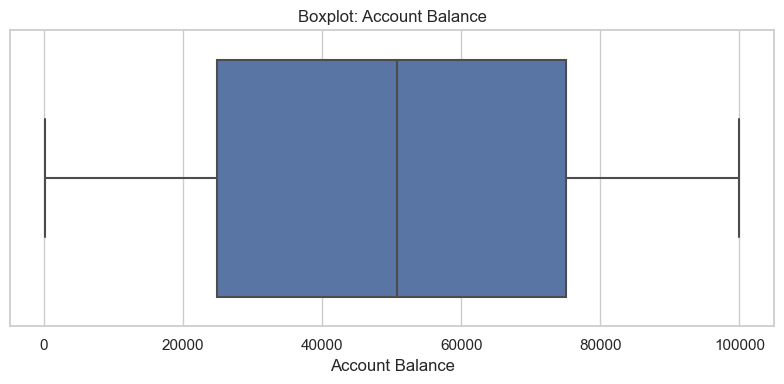

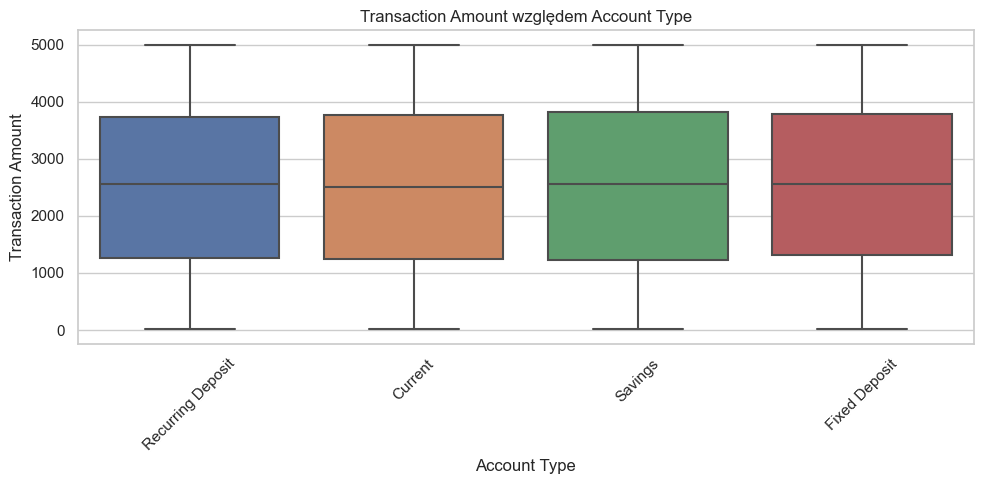

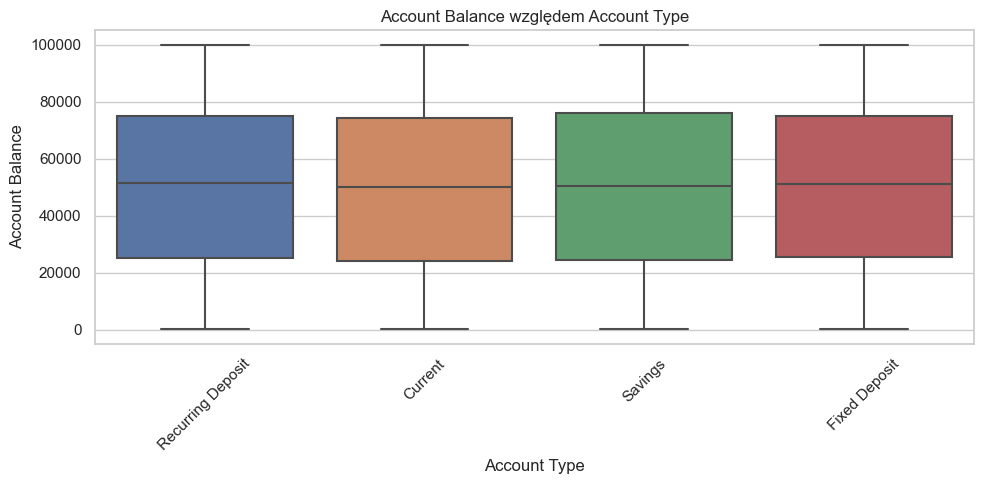

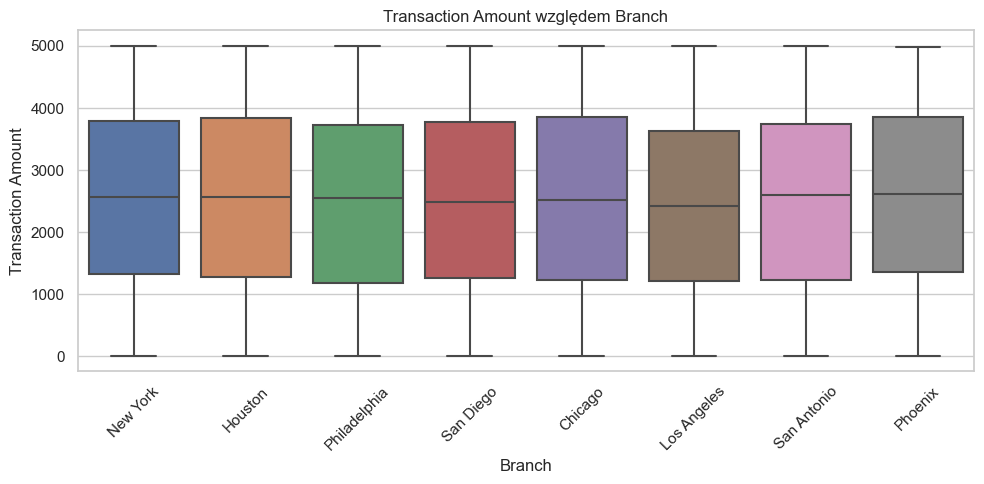

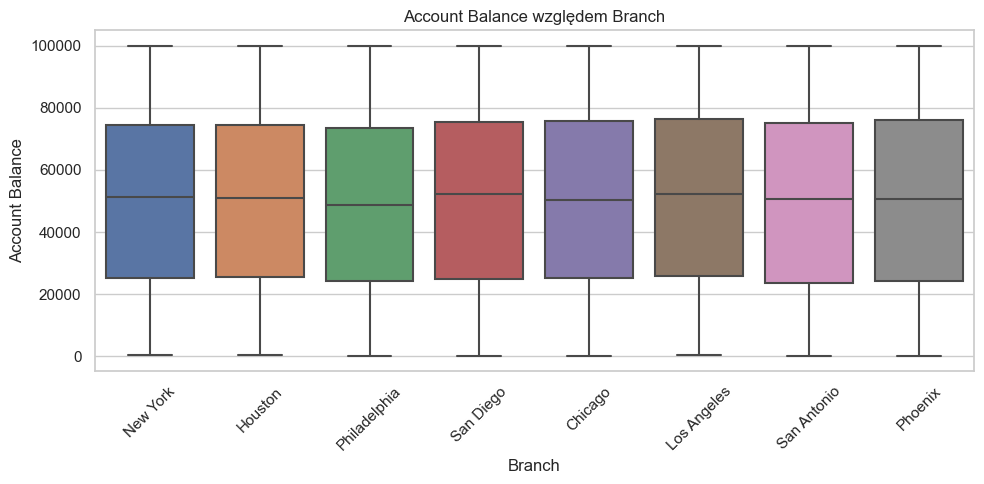

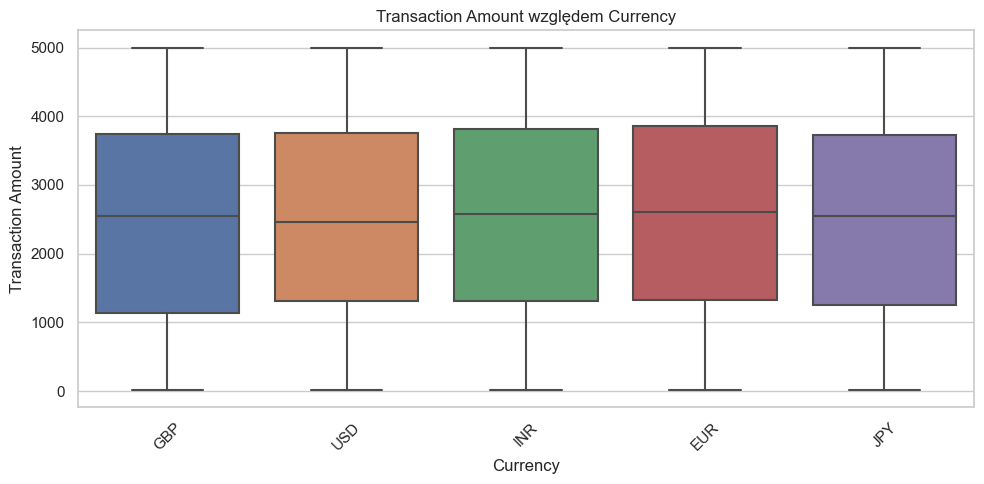

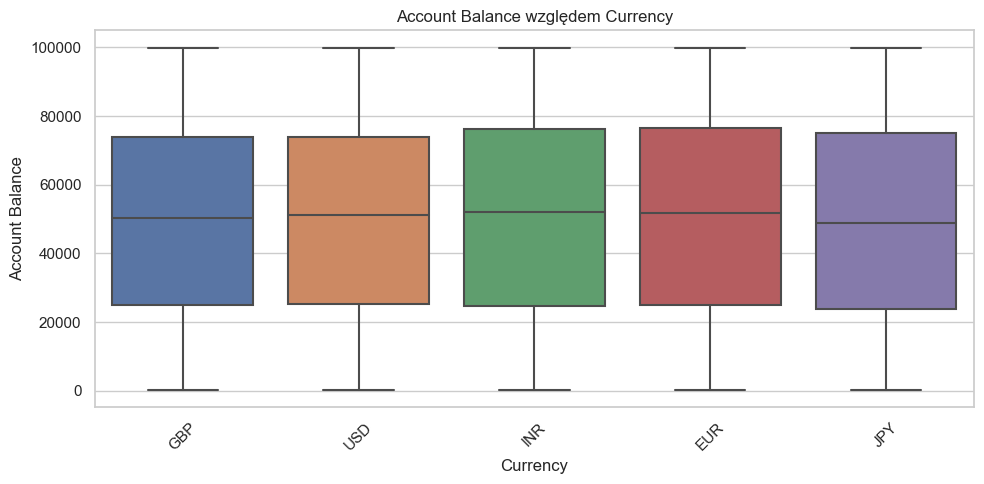

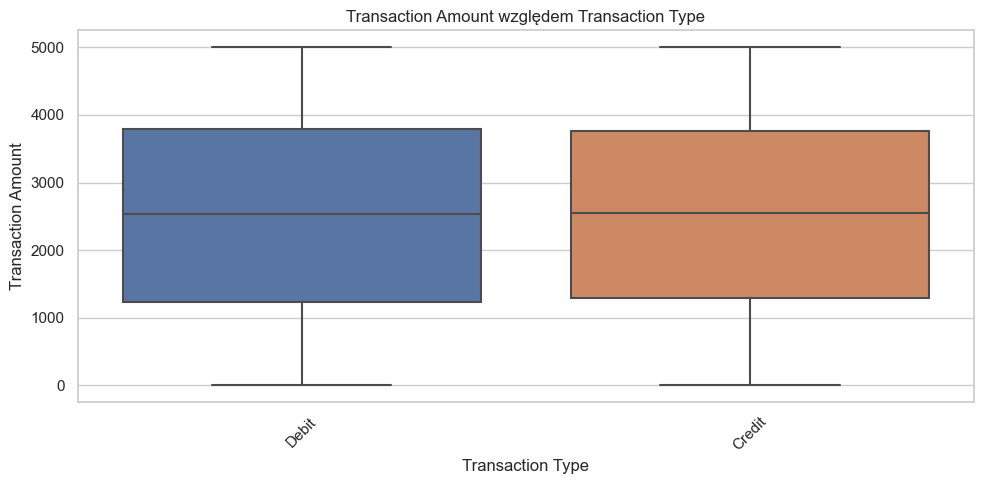

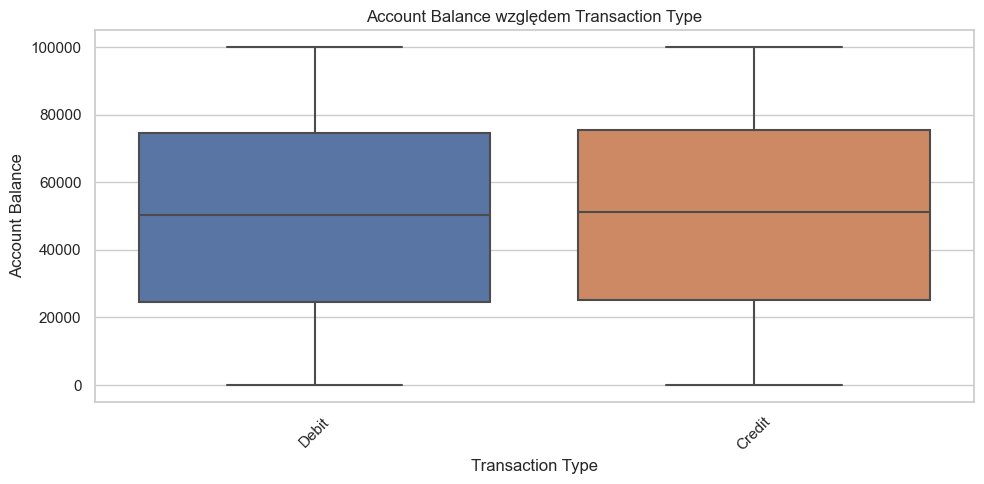

In [8]:

# Statystyki opisowe dla zmiennych liczbowych
print("Statystyki opisowe zmiennych liczbowych:")
print(df_clean[['Transaction Amount', 'Account Balance']].describe())

# Histogramy z gęstością
for col in ['Transaction Amount', 'Account Balance']:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Rozkład: {col}')
    plt.xlabel(col)
    plt.ylabel('Liczba obserwacji')
    plt.tight_layout()
    plt.show()

# Ogólne boxploty
for col in ['Transaction Amount', 'Account Balance']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_clean[col])
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()
    plt.show()

# Boxploty względem zmiennych kategorycznych
kategoriczne = ['Account Type', 'Branch', 'Currency', 'Transaction Type']
liczbowe = ['Transaction Amount', 'Account Balance']

for kat in kategoriczne:
    for num in liczbowe:
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df_clean, x=kat, y=num)
        plt.title(f'{num} względem {kat}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


In [9]:
#Sprawdzam czy nie ma żadnych zer w Account balance żeby uniknąć dzielenia przez 0 w kolejnym kroku
print((df_clean['Account Balance'] == 0).sum())


0


In [10]:
df_clean['Transaction_To_Balance_Ratio'] = (df_clean['Transaction Amount'] + 1e-3)/df_clean['Account Balance'] 


In [11]:
#Zmienna pokazująca które branche mają najwięcej klientów

branch_counts = df_clean['Branch'].value_counts()
df_clean['Branch_Size'] = df_clean['Branch'].map(branch_counts)
scaler = MinMaxScaler()
df_clean['Branch_Size'] = scaler.fit_transform(df_clean[['Branch_Size']])

In [12]:
# Dodaje zmienną pokazującą czy transakcja była duża (75 centyl)
threshold = df_clean['Transaction Amount'].quantile(0.75)
df_clean['Is_High_Value_Transaction'] = (df_clean['Transaction Amount'] > threshold).astype(int)


In [13]:
# Dodaje zmienną łączoną: typ konta + typ transakcji
df_clean['Account_Transaction'] = df_clean['Account Type'] + ' - ' + df_clean['Transaction Type']


In [14]:
#Dodatkowa zmienna czy balans konta jest wysoki (75 centyl)
balance_thresh = df_clean['Account Balance'].quantile(0.75)
df_clean['High_Balance_flag'] = (df_clean['Account Balance'] > balance_thresh).astype(int)


In [15]:
df_clean = pd.get_dummies(df_clean, columns=['Branch', 'Account_Transaction'], drop_first=True, dtype=int)


In [16]:
df_clean.head()

,Account Type,Transaction Type,Transaction Amount,Account Balance,Currency,Transaction_To_Balance_Ratio,Branch_Size,Is_High_Value_Transaction,High_Balance_flag,Branch_Houston,...,Branch_Phoenix,Branch_San Antonio,Branch_San Diego,Account_Transaction_Current - Debit,Account_Transaction_Fixed Deposit - Credit,Account_Transaction_Fixed Deposit - Debit,Account_Transaction_Recurring Deposit - Credit,Account_Transaction_Recurring Deposit - Debit,Account_Transaction_Savings - Credit,Account_Transaction_Savings - Debit
0,Recurring Deposit,Debit,2687.19,36676.19,GBP,0.073268,0.695238,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Recurring Deposit,Debit,3886.77,28582.82,USD,0.135983,0.723810,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,Current,Credit,2438.74,76599.56,GBP,0.031838,0.695238,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Recurring Deposit,Credit,2758.53,62317.60,INR,0.044266,1.000000,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Current,Debit,3287.00,85515.21,INR,0.038438,1.000000,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [17]:
df_clean = df_clean.drop(columns=['Account Type', 'Transaction Type'])


In [18]:

# Normalizujemy kolumny
cols_to_scale = ['Transaction Amount', 'Account Balance']

scaler = MinMaxScaler()

df_clean[cols_to_scale] = scaler.fit_transform(df_clean[cols_to_scale])


In [19]:
df_clean.head()

,Transaction Amount,Account Balance,Currency,Transaction_To_Balance_Ratio,Branch_Size,Is_High_Value_Transaction,High_Balance_flag,Branch_Houston,Branch_Los Angeles,Branch_New York,...,Branch_Phoenix,Branch_San Antonio,Branch_San Diego,Account_Transaction_Current - Debit,Account_Transaction_Fixed Deposit - Credit,Account_Transaction_Fixed Deposit - Debit,Account_Transaction_Recurring Deposit - Credit,Account_Transaction_Recurring Deposit - Debit,Account_Transaction_Savings - Credit,Account_Transaction_Savings - Debit
0,0.536443,0.366206,GBP,0.073268,0.695238,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.776897,0.285169,USD,0.135983,0.723810,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.486642,0.765944,GBP,0.031838,0.695238,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.550743,0.622944,INR,0.044266,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.656674,0.855213,INR,0.038438,1.000000,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [20]:
print("Unikalne wartości w kolumnie 'Currency':")
print(df_clean['Currency'].value_counts())


Unikalne wartości w kolumnie 'Currency':
Currency
JPY    2041
EUR    2039
USD    2035
GBP    1958
INR    1927
Name: count, dtype: int64


In [21]:
# One-hot encoding walut, dodatkowo pierwsza waluta zakodowana jako 0 w pozostałych (EUR)
df_clean = pd.get_dummies(df_clean, columns=['Currency'], drop_first=True, dtype=int)


In [22]:
df_clean.head()

,Transaction Amount,Account Balance,Transaction_To_Balance_Ratio,Branch_Size,Is_High_Value_Transaction,High_Balance_flag,Branch_Houston,Branch_Los Angeles,Branch_New York,Branch_Philadelphia,...,Account_Transaction_Fixed Deposit - Credit,Account_Transaction_Fixed Deposit - Debit,Account_Transaction_Recurring Deposit - Credit,Account_Transaction_Recurring Deposit - Debit,Account_Transaction_Savings - Credit,Account_Transaction_Savings - Debit,Currency_GBP,Currency_INR,Currency_JPY,Currency_USD
0,0.536443,0.366206,0.073268,0.695238,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
1,0.776897,0.285169,0.135983,0.723810,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.486642,0.765944,0.031838,0.695238,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.550743,0.622944,0.044266,1.000000,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0.656674,0.855213,0.038438,1.000000,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [23]:

import os

os.makedirs('data', exist_ok=True)

df_clean.to_csv('data/clean_data.csv', index=False)


In [24]:
import numpy as np
import pandas as pd
import os

df = pd.read_csv("data/clean_data.csv")
df_fe2 = df.copy()

if 'Currency' in df_fe2.columns:
    df_fe2['Is_USD'] = (df_fe2['Currency'] == 'USD').astype(int)

branch_cols = [col for col in df_fe2.columns if col.startswith('Branch_') and col != 'Branch_Size']

branch_freqs = df_fe2[branch_cols].sum() / len(df_fe2)

def assign_branch_weight(row):
    for branch in branch_cols:
        if row[branch] == 1:
            return branch_freqs[branch]
    return 0.0

df_fe2['Branch_Frequency_Weight'] = df_fe2.apply(assign_branch_weight, axis=1)

df_fe2 = df_fe2.drop(columns=[col for col in df_fe2.columns 
                              if (col.startswith('Branch_') and col != 'Branch_Frequency_Weight') 
                              or col.startswith('Currency_')])

if 'Branch_Size' in df_fe2.columns:
    df_fe2 = df_fe2.drop(columns='Branch_Size')

for col in ['Branch', 'Currency']:
    if col in df_fe2.columns:
        df_fe2 = df_fe2.drop(columns=col)

transaction_cols = [col for col in df_fe2.columns if col.startswith('Account_Transaction_')]
weights = [round(i, 2) for i in np.linspace(0.14, 1.0, len(transaction_cols))]  # 7 wag

for col, weight in zip(transaction_cols, weights):
    df_fe2[col] = df_fe2[col] * weight

df_fe2['Account_Transaction_Encoded'] = df_fe2[transaction_cols].sum(axis=1)

df_fe2 = df_fe2.drop(columns=transaction_cols)

In [25]:
df_fe2.to_csv('data/final_data_fe2.csv', index=False)


In [26]:
from sklearn.model_selection import train_test_split
df = df_fe2
train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
train, val = train_test_split(train, test_size=0.25, random_state=42, shuffle=True)
train.to_csv('data/train_data.csv', index=False)
val.to_csv('data/val_data.csv', index=False)
test.to_csv('data/test_data.csv', index=False)

print("Podział zakończony:")
print(f"Train: {train.shape}")
print(f"Validation: {val.shape}")
print(f"Test: {test.shape}")


Podział zakończony:
Train: (6000, 7)
Validation: (2000, 7)
Test: (2000, 7)
